<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">


# Taller 5: Aprendizaje no supervisado.

## <span style="color:red"> Outline </span> 

1. [Ejercicio 1. Image K-means](#eje1)
2. [Ejercicio 2. Variedades de Trigo](#eje2)
3. [Ejercicio 3. AgglomerativeClustering](#eje3)
4. [Ejercicio 4. PCA + Nonsupervised](#eje4)





#### <font style="color: red"> Esta práctica contiene 4 ejercicios <!-- ONLY IN NOTEBOOK -->


In [1]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student/talleres20201')
#os.chdir('/content/drive/My Drive/ai-uis-student/talleres20201')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/course-IA1/ai-uis-student/talleres20201


In [2]:
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
np.random.seed(1201920704)

## <span style="color:green"> If you are in colaboratoy </span>: 

In [3]:
from google.colab import drive
drive.mount('/content/drive')
#%cd drive/My Drive/ai-uis-student/course-IA1/talleres20201
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/course-IA1/ai-uis-student/talleres20201


<h2><span style="color:#FFF; background-color:#F00; font-weight:bold; padding:4px;">¡IMPORTANTE!</span></h2><br><h2 style="margin-top:-10px;">Usted debe ejecutar <span style="color:#F00;">TODAS</span> las celdas de tipo <span style="color:#F00;">CODE</span>. De lo contrario, sus respuestas no serán procesadas correctamente.</h2>

## Ejercicio 1 <a name="eje1"></a>

Escriba una función que se le pase como argumento una imagen `img` y dos diferentes valores para el número de clusters *K*: ` k_c1, k_c2`. La función debe calcular dos diferentes k-means con numero de centroides: ` k_c1, k_c2`, respectivamente. Las caracteristicas **X** para el entrenamiento, son: 
- El componente de color R   (se asume que es el canal 0)
- El componente de color G   (se asume que es el canal 1)
- El componente de color B   (se asume que es el canal 2)
- Los indices y de la imagen (valores en columnas)
- Los indices x de la imagen (valores en filas)
 
La función debe devolver el vector de etiquetas para el `kmeans(K_c1)`, el vector de etiquetas para el `kmeans(K_c2)` y sus respectivos estimadores ya entrenados. 
    

In [4]:
def img_seg(img, k_c1, k_c2):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans 
    from sklearn.cluster import DBSCAN
    np.random.seed(1201920704)
    width, height = img.shape[0], img.shape[1]
    entrada=[]
    for y in range(0,height):
      for x in range(0,width):
        aux2=[]
        aux2=list(img[y][x])
        aux2.append(y)
        aux2.append(x)
        entrada.append(aux2)  
  
    X=np.array(entrada)
    
    kmeans_c1=KMeans(n_clusters=k_c1)  
    kmeans_c2=KMeans(n_clusters=k_c2)

    kmeans_c1.fit(X,width,height)
    kmeans_c2.fit(X,width,height)
    return kmeans_c1.labels_, kmeans_c2.labels_, kmeans_c1, kmeans_c2

#Colaboratory
import urllib.parse, inspect
src1 = urllib.parse.quote_plus(inspect.getsource(img_seg))

#Virtualbox
#import urllib, inspect
#src1 = urllib.quote_plus(inspect.getsource(img_seg))

In [5]:
img = io.imread("misc/cor.jpg")
print(img.shape)
X=img.reshape([-1,3])
print(X.shape)


(100, 100, 3)
(10000, 3)


Compruebe el resultado de la función con el siguiente código: 

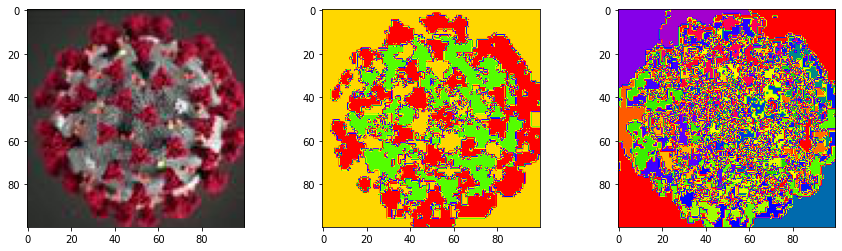

In [6]:
img = io.imread("misc/cor.jpg")
width, height = img.shape[0], img.shape[1]
kmeansLabels_c1, kmeansLabels_c2, k1, k2  = img_seg(img, k_c1=3, k_c2=30)
plt.figure(figsize=(15,4))
plt.subplot(131);
plt.imshow(img)
plt.subplot(132);
plt.imshow(kmeansLabels_c1.reshape(width, height), cmap = plt.cm.get_cmap('prism'));
plt.subplot(133);
plt.imshow(kmeansLabels_c2.reshape(width, height), cmap = plt.cm.get_cmap('prism'));


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [7]:
!./run CHECK_SOLUTION PS4_1 $src1

(100, 100, 3) (100, 100) (100, 100)
evaluation result CORRECT


##  Ejercicio 2 <a name="eje2"></a>

El dataset `misc/seeds-less-rows.csv` presenta un conjunto de caracteristicas que identifican 3 diferentes variedades de trigo. Escriba una función que carge este *dataset*, separe los datos en etiquetas (clases de semillas) y caracteristicas **X** y realice un agrupamiento utilizando el algoritmo **DBSCAN** y todas las caracteristicas.

La función debe: 
- **recibir** los parametros `epsilon`, `min_points` para fijar el algoritmo DBSCAN
- **devolver** un arreglo **numérico** con los etiquetas de las semillas. 
- **devolver** el vector de etiquetas resultado del DBSCAN
- **devolver** el respectivo estimador ya entrenado


In [8]:
def seeds_func(epsilon,min_points):
    import numpy as np
    import pandas as pd
    from sklearn.cluster import DBSCAN
    from sklearn.preprocessing import StandardScaler
    from sklearn import preprocessing
    seeds_df = pd.read_csv('misc/seeds-less-rows.csv')
    X = seeds_df.values[:][:,:-2]
    #X = StandardScaler().fit_transform(X) 
    DBS = DBSCAN(eps=epsilon,min_samples=min_points)
    DBS.fit(X)
    le = preprocessing.LabelEncoder()
    le.fit(seeds_df['grain_variety'])
    class_int= np.array(le.transform(seeds_df['grain_variety']))
    return class_int, DBS.labels_, DBS

#Colaboratory
import urllib.parse, inspect
src2 = urllib.parse.quote_plus(inspect.getsource(seeds_func))

#Virtualbox
#import urllib, inspect
#src2 = urllib.quote_plus(inspect.getsource(seeds_func))

In [9]:
seeds_df = pd.read_csv('misc/seeds-less-rows.csv')
seeds_df.head(5)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat


Compruebe su código aquí. 

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

seeds_df = pd.read_csv('misc/seeds-less-rows.csv')
le.fit(seeds_df['grain_variety'])
X = seeds_df.values[:][:,:-2]
print(X.shape)
#print(X[0])
#seeds_df.head(5)
list(le.classes_)
y= np.array(le.transform(seeds_df['grain_variety']))
print(y.shape)

(42, 6)
(42,)


(42, 8)


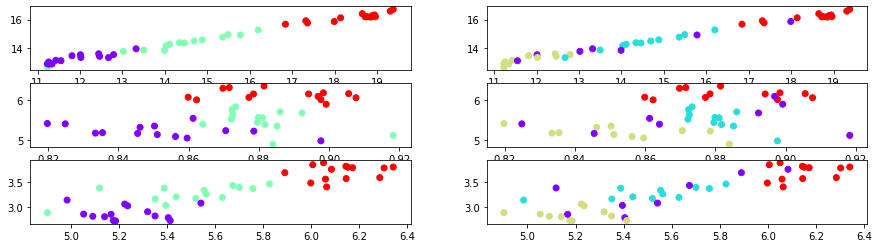

In [11]:
seeds_df = pd.read_csv('misc/seeds-less-rows.csv')
X = seeds_df.values
print( X.shape)
class_int, labels, DBS =seeds_func(epsilon= 1.2,min_points=3)

plt.figure(figsize=(15,4))
plt.subplot(321);
plt.scatter(X[:,0],X[:,1], c=class_int, cmap='rainbow') 
plt.subplot(322);
plt.scatter(X[:,0],X[:,1], c=labels, cmap='rainbow') 
plt.subplot(323);
plt.scatter(X[:,2],X[:,3], c=class_int, cmap='rainbow') 
plt.subplot(324);
plt.scatter(X[:,2],X[:,3], c=labels, cmap='rainbow') 
plt.subplot(325);
plt.scatter(X[:,3],X[:,4], c=class_int, cmap='rainbow') 
plt.subplot(326);
plt.scatter(X[:,3],X[:,4], c=labels, cmap='rainbow') 

 

#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta

In [12]:
!./run CHECK_SOLUTION PS4_2 $src2

evaluation result CORRECT


##  Ejercicio 3 <a name="eje3"></a>

Existen muchos otros métodos para agrupar caracteristicas y aplicar el principio de algoritmos no supervisados. Escriba una función que explore el método de agrupamiento agrlometarivo (`AgglomerativeClustering`) sobre el dataset de `sklearn` que se denomina `make_gaussian_quantiles`. La función debe: 

- **recibir** los parametros `num_clusters` para fijar el algoritmo  `AgglomerativeClustering`
- **devolver** los puntos generados por el dataset `make_gaussian_quantiles`
- **devolver** las etiquetas de los puntos
- **devolver** el vector de etiquetas resultado del `AgglomerativeClustering`
- **devolver** el respectivo estimador ya entrenado

En cuanto al dataset `make_gaussian_quantiles` genere puntos con los siguientes parametros.

- 500 elementos
- 2 caracteristicas



Referencia Gaussian quantiles [ https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_gaussian_quantiles.html ] <br>

In [13]:
def agg_func(num_clusters):
  from sklearn.datasets import make_gaussian_quantiles
  import numpy as np
  import pandas as pd
  from sklearn.cluster import AgglomerativeClustering
  from sklearn.preprocessing import StandardScaler
  import matplotlib.pyplot as plt

  d=make_gaussian_quantiles(n_samples=500,n_features=2)
  X=d[0]
  y=d[1]

  clus=AgglomerativeClustering(n_clusters=num_clusters)
  clus.fit(X)

  return  X,y,clus.labels_,clus

#Colaboratory
import urllib.parse, inspect
src3 = urllib.parse.quote_plus(inspect.getsource(agg_func))

#Virtualbox
#import urllib, inspect
#src3 = urllib.quote_plus(inspect.getsource(ac_func))

In [14]:
from sklearn.datasets import make_gaussian_quantiles

X,y,labels, ac =agg_func(num_clusters=3)

#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [ ]:
!./run CHECK_SOLUTION PS4_3 $src3

evaluation result CORRECT


##  Ejercicio 4 <a name="eje4"></a>

Cuando se tienen datos n-dimensionales, uno de los mas grandes desafios es su visualización para el análisis y la toma de decisiones. Un método empleado es la reducción n-dimensional usadando el PCA. También estos métodos nos permiten reducir el espacio de busqueda para los algoritmos de agrupamiento, pudiendo obtener mejores resultados. 

Implemente una función que reciba como parametros `epsilon, min_points, k_centroids, P_comp` para el ajuste de un algoritmo DBSCAN, el K-means y los componentes del PCA. La función debe calcular los `P_comp` componentes del PCA del dataset de `sklearn` que se denomina `make_gaussian_quantiles`. 


. Una vez obtenido los  `P_comp` componentes, transforme todas sus caracteristicas hacia estos componentes, es decir, ahora tendra unicamente  `P_comp` caracteristicas. Utilizando estas *PCA-features* entrene un Kmeans(clusters =k_centroids) y un DBSCAN(epsilon, min_points). 

La función debe devolver: 
- **devolver** los puntos de `make_gaussian_quantiles` pero **transformados** por el PCA
- **devolver** las etiquetas de los puntos
- **devolver**El vector de  etiquetas del kmeans
- **devolver** El vector de  etiquetas del DBSCAN
- **devolver** Los objetos entrenados KMEANS, BDSCAN y  PCA

En cuanto al dataset `make_gaussian_quantiles` genere puntos con los siguientes parametros.

- 1000 elementos
- 20 caracteristicas
- 5 clases


In [ ]:
def pca_and_clustering(epsilon=0.2,min_points=3, k_centroids=5,P_comp=2 ):
    import numpy as np
    import pandas as pd
    from sklearn.decomposition import PCA
    from sklearn.cluster import DBSCAN
    from sklearn.cluster import KMeans
    from sklearn.datasets import make_gaussian_quantiles
    np.random.seed(1201920704)
    d=make_gaussian_quantiles(n_samples=1000,n_features=20,n_classes=5)
    X=d[0]
    y=d[1]
    p=PCA(n_components=P_comp)
    p.fit(X)
    
    kmean=KMeans(n_clusters=k_centroids)
    DBS=DBSCAN(eps=epsilon,min_samples=min_points)

    kmean.fit(X)
    DBS.fit(X)
    
    return X,y, kmean.labels_, DBS.labels_, kmean, DBS, p

#Colaboratory
import urllib.parse, inspect
src4 = urllib.parse.quote_plus(inspect.getsource(pca_and_clustering))

#Virtualbox
#import urllib, inspect
#src4 = urllib.quote_plus(inspect.getsource(pca_and_clustering))

Compruebe su función aquí: 

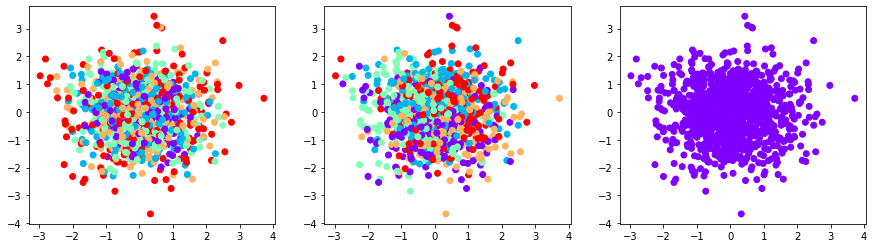

In [ ]:
X,y, kmeans_labels, DBS_labels, KMEANS_, DBS_, PCA_ =pca_and_clustering(epsilon= 0.4,min_points=15, k_centroids=5, P_comp=3)

plt.figure(figsize=(15,4))
plt.subplot(131);
plt.scatter(X[:,0],X[:,1], c=y, cmap='rainbow') 
plt.subplot(132);
plt.scatter(X[:,0],X[:,1], c=kmeans_labels, cmap='rainbow') 
plt.subplot(133);
plt.scatter(X[:,0],X[:,1], c=DBS_labels, cmap='rainbow') 


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [ ]:
!./run CHECK_SOLUTION PS4_4 $src4

evaluation result CORRECT


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Pasos Finales. 



#### 1. Reemplace la variable con su código de estudiante

In [ ]:
#Colaboratory
import urllib.parse, inspect
taller = urllib.parse.quote_plus("Taller_04_20201_AlgNoSupervisados")
codigo = urllib.parse.quote_plus("tl4_2180027")

#Virtualbox
#import urllib, inspect
#taller = urllib.quote_plus("Taller_04_20201_AlgNoSupervisados")
#codigo = urllib.quote_plus("tl4_12345")

print(taller, codigo)

Taller_04_20201_AlgNoSupervisados tl4_2180027


#### 2. Guarde los cambios del taller:

In [ ]:
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

#### 3. Ejecute la siguiente celda y envíe el archivo comprimido

In [ ]:
!./convert_ipynb.sh $codigo $taller

uno: tl4_2180027 dos Taller_04_20201_AlgNoSupervisados
¡PERFECTO!, el archivo   'tl4_2180027.ipynb'   se creó correctamente :D


---
<img src="../imgs/bannerThanks.jpg" style="width:1000px;">